# **EXPLORATORY DATA ANALYSIS**

In this document we will explore the entire dataset.

The dataset can be reach here: https://www.kaggle.com/c/m5-forecasting-accuracy

Explaination of the dataset: https://mofc.unic.ac.cy/wp-content/uploads/2020/01/M5-Guidelines.pdf

## 1. Loading Data from drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download csv file from resources and put it in working directory

calendar = pd.read_csv('../Demand Forecasting M5/calendar.csv', header = 0)
sales = pd.read_csv('../Demand Forecasting M5/sales_train_evaluation.csv', header = 0)
sales_val = pd.read_csv('../Demand Forecasting M5/sales_train_validation.csv', header = 0)
sample_sub = pd.read_csv('../Demand Forecasting M5/sample_submission.csv', header = 0)
sell_prices = pd.read_csv('../Demand Forecasting M5/sell_prices.csv', header = 0)

## 2. The datasets



### The **calendar** dataset

It contains information about the dates in which the products are sold.

● date: The date in a “y-m-d” format.

● wm_yr_wk: The id of the week the date belongs to.

● weekday: The type of the day (Saturday, Sunday, …, Friday).

● wday: The id of the weekday, starting from Saturday.

● month: The month of the date.

● year: The year of the date.

● event_name_1: If the date includes an event, the name of this event.

● event_type_1: If the date includes an event, the type of this event.

● event_name_2: If the date includes a second event, the name of this 
event.

● event_type_2: If the date includes a second event, the type of this event.

● snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP purchases on the examined date. 1 indicates that SNAP purchases are allowed.

In [3]:
print("Dimensions of the calendar Dataset:", calendar.shape)
calendar.head(5)

Dimensions of the calendar Dataset: (1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


### The **sales** dataset
It contains the historical daily unit sales data per product and store.
So, each row is a series of days related to the sale of an object of a certain store.

Difference between validation and evaluation dataset: the validation dataset is the dataset that we use to train our model. Remember that we have to forecast 28 days. The evaluation dataset is the entire dataset with also the 28 days.

● item_id: The id of the product.

● dept_id: The id of the department the product belongs to.

● cat_id: The id of the department the product belongs to.

● store_id: The id of the store where the product is sold.

● state_id: The State where the store is located.

● d_1, d_2, …, d_i, … d_1941: The number of products sold at day i, starting from 2011-01-29.

In [4]:
print("Dimensions of our entire dataset: ", sales.shape)
print()
sales.head()

Dimensions of our entire dataset:  (30490, 1947)



,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
print("Dimensions of the validation dataset: ", sales_val.shape)
sales_val.head()

Dimensions of the validation dataset:  (30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


### The **sell_prices** dataset
It contains information about the price of the products sold per store and date.

● store_id: The id of the store where the product is sold.

● item_id: The id of the product.

● wm_yr_wk: The id of the week.

● sell_price: The price of the product for the given week/store. Price is provided per week (average across seven days). If not available, this means that the product was not sold during the examined week.

In [6]:
print(sell_prices.shape)
sell_prices.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


### The **sample_sub**
The correct format for submissions.

In [7]:
print(sample_sub.shape)
sample_sub.head()

(60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Exploring the calendar dataset 

In [8]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


Each row represent a date and we have some features like the weekday or if an event occured in that day. The important parameter is the column "d" that allows to connect this dataset with the sales dataset. 

In [9]:
calendar.shape, sales.shape


((1969, 14), (30490, 1947))

In [10]:
calendar.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [11]:
def plot_bar_sns(data, column, ylabel, title):

    count = data[column].value_counts()
    plt.figure(figsize = ((round(10/3) * len(count)),10))
    ax = sns.barplot(x = count.index, y = count.values)
 
    for bar in ax.patches:
        ax.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_height()*1.01))
                    
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel(ylabel)
    plt.show()


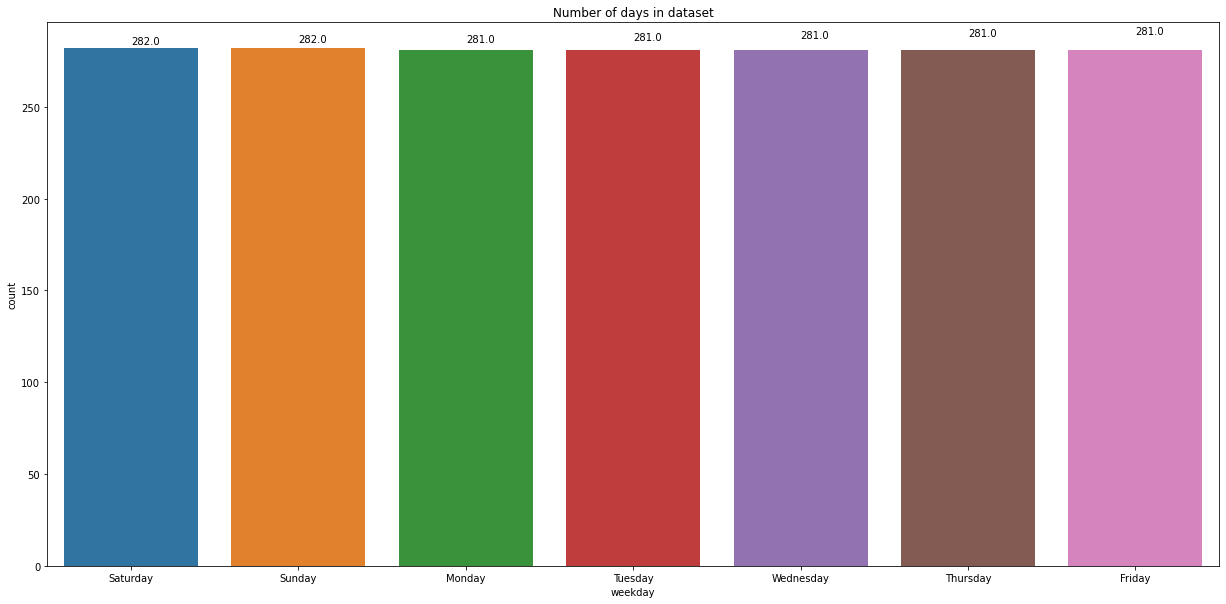

In [12]:
plot_bar_sns(calendar, 'weekday', 'count', 'Number of days in dataset')

Observation: looking at this plot we can see that we have balanced date for each day.

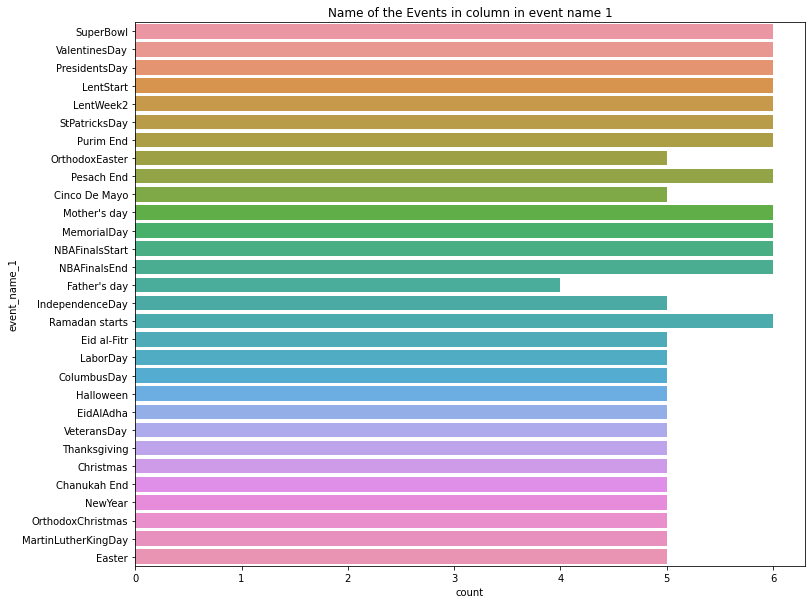

In [13]:
# Events in column "event_name_1"
plt.figure(figsize = (12, 10))
plots = sns.countplot(y = calendar.event_name_1)
plt.title("Name of the Events in column in event name 1")
plt.show()

Observation: one of the events is the SuperBowl that appears 6 times in the dataset and we have a dataset spanning 6 years


In [14]:
def bar_plot_sns_categories(data, column, title):
    plt.figure(figsize=(10, 4))
    plots = sns.countplot(x=data[column])
    for bar in plots.patches:
        plots.annotate(bar.get_height(),  
                    (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()))
    plt.title('Count of events in column '+ title)
    plt.show()

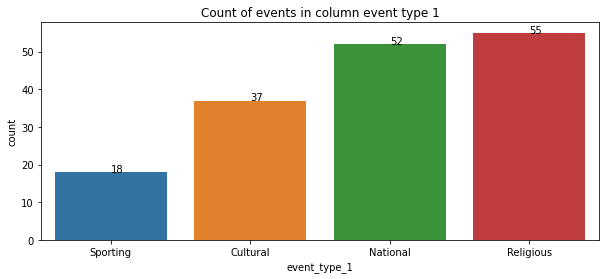

In [15]:
bar_plot_sns_categories(calendar, 'event_type_1','event type 1')

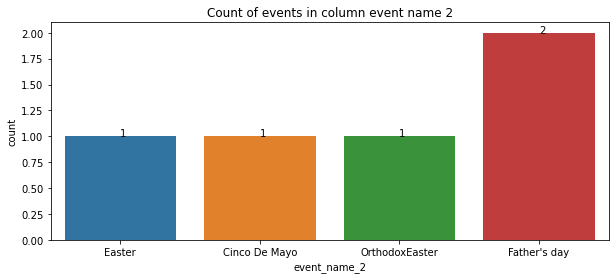

In [16]:
bar_plot_sns_categories(calendar, 'event_name_2','event name 2')

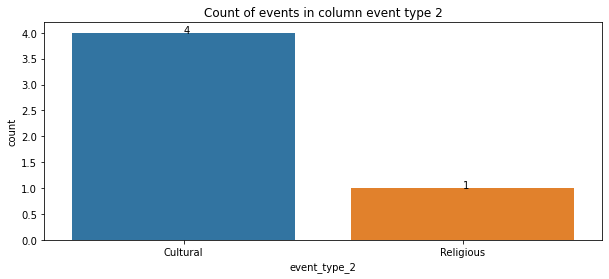

In [17]:
bar_plot_sns_categories(calendar, 'event_type_2','event type 2')

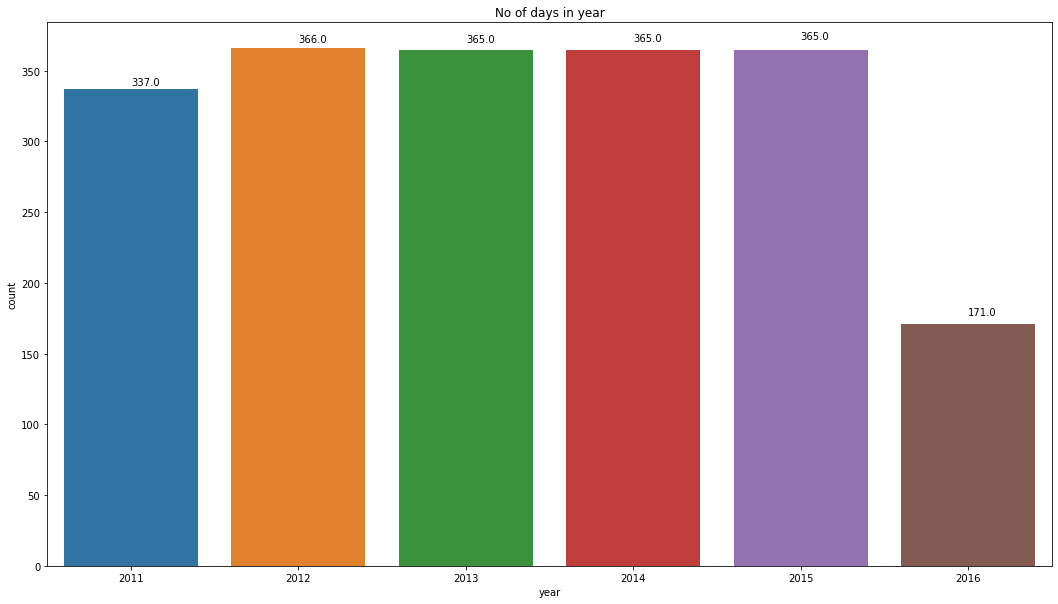

In [18]:
plot_bar_sns(calendar, 'year', 'count', 'No of days in year')

Observation: years 2012-2013-2014-2015 are complete, while 2011 and 2016 are not.

In [19]:
def catplot(data, xlabel, kind, hue, title):
    sns.catplot(x='year', data=calendar, kind = 'count', hue = 'snap_WI')
    plt.title(title)
    plt.show()

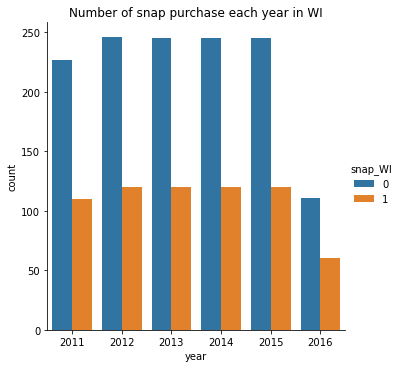

In [20]:
#no of snap purchase each year in WI
catplot(calendar, 'year', 'count', 'snap_WI', 'Number of snap purchase each year in WI')

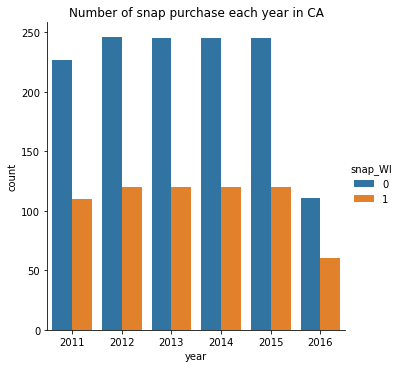

In [21]:
#no of snap purchase each year CA
catplot(calendar, 'year', 'count', 'snap_CA', 'Number of snap purchase each year in CA')

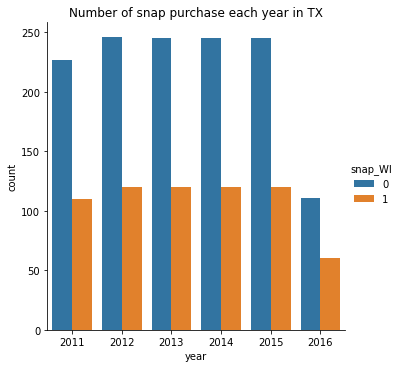

In [22]:
#no of snap purchase each year TX
catplot(calendar, 'year', 'count', 'snap_TX', 'Number of snap purchase each year in TX')

In [23]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


Observation: there are a lot of NaN values. 

## 4. Exploring the sales dataset

### 4.1 Exploring the dataset by row (by product)

In [24]:
# Function to plot the distribution of the data by row

def distribution_of_products_row_per_column_plt(data, column, title_x_axis):

  count = data[column].value_counts()
  print('total no of ' + title_x_axis, len(count))
  print()
  print('products per ' + title_x_axis)
  print(count)
  print()

  per = np.round(count.values*100/count.values.sum() ,2)
  plt.figure(figsize=((round(10/3) * len(count)),10))

  colors = np.random.rand(len(count),3)

  g = plt.bar(count.index, count.values, color = colors)
  plt.title('distribution of ' + title_x_axis)
  plt.xlabel(title_x_axis)
  plt.ylabel('range of distribution')

  for idx,bar in enumerate(g):
      width = bar.get_width()
      height = bar.get_height()
      x, y = bar.get_xy()
      plt.text(x+width/2,
              y+height*1.01,
              str(per[idx])+'% [' + str(count.values[idx]) + ']',
              ha='center',
              weight='bold')

  plt.show()


total no of states 3

products per states
CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64



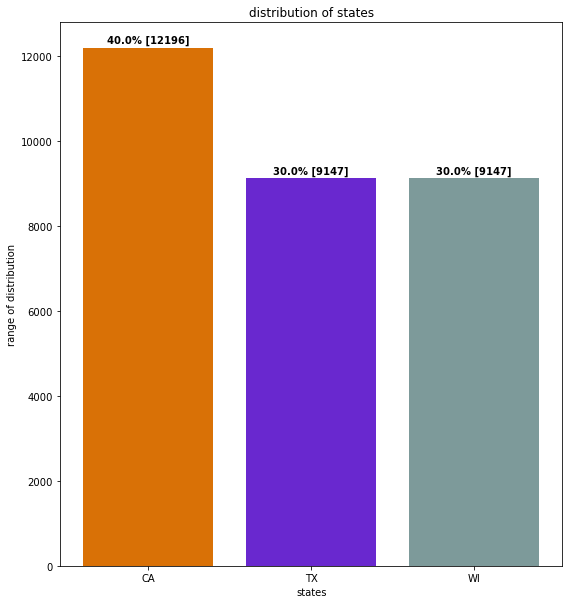

In [25]:
# Number of products of each state
sales.state_id.value_counts()

distribution_of_products_row_per_column_plt(sales, 'state_id', 'states')

Observation: we have three states CA, WI, TX. WI and TX states have same number of data and they have less data than CA.


total no of stores 10

products per stores
CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: store_id, dtype: int64



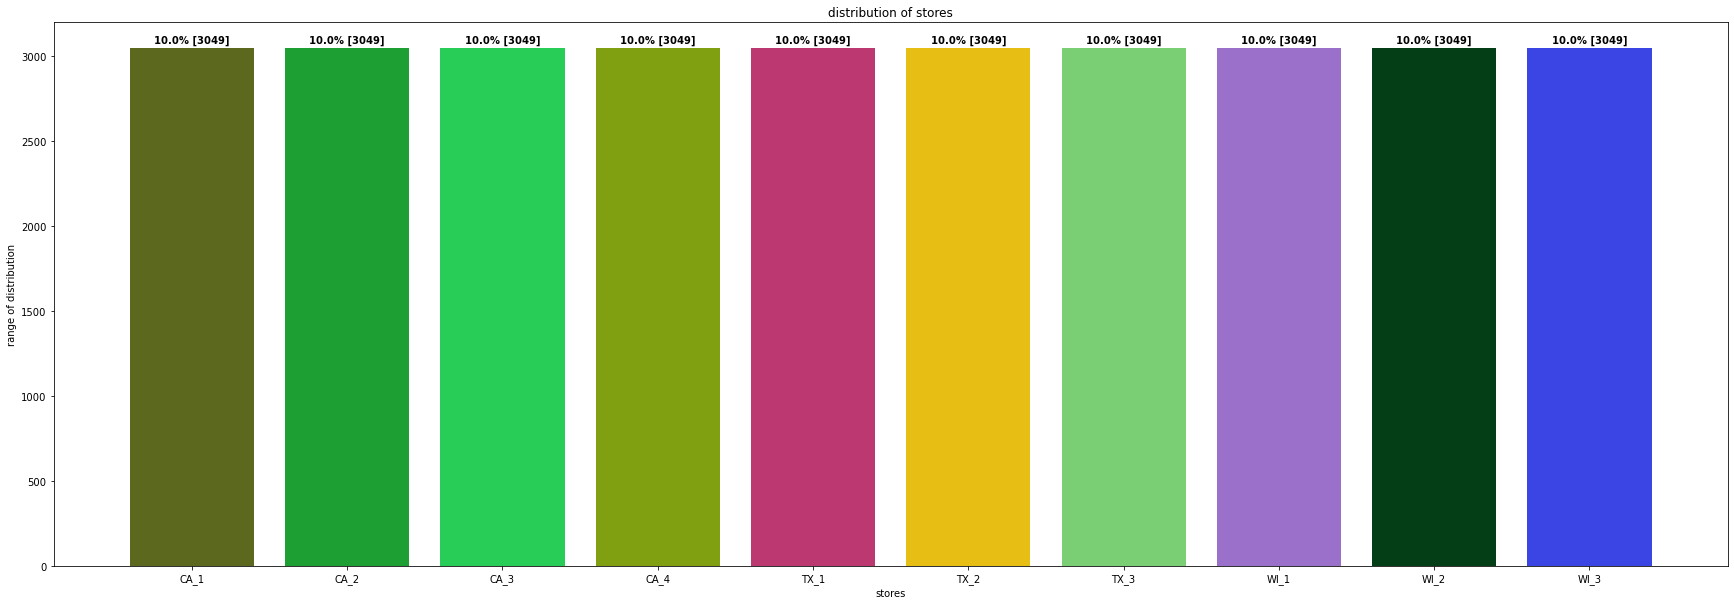

In [26]:
# Number of stores 

distribution_of_products_row_per_column_plt(sales, 'store_id', 'stores')

There are 4 stores in CA, 3 in TX and 3 in WI. Each store have 3049 products, and this is the reason why in the previous plot we found out that CA have more products than the others.

total no of categories 3

products per categories
FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64



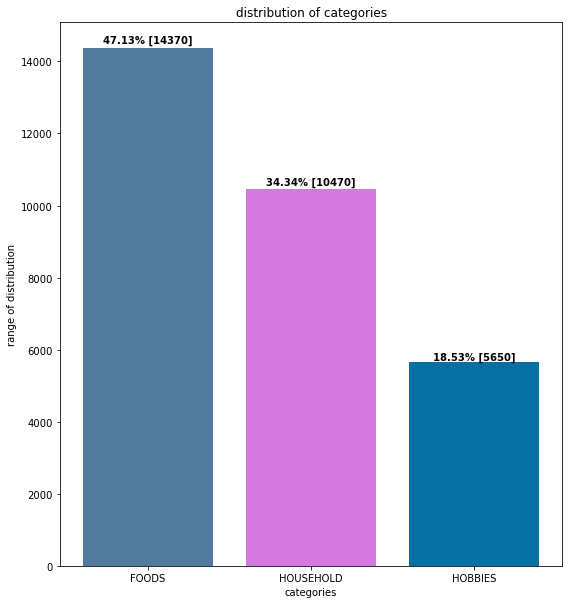

In [27]:
# Each product (like HOBBIES_1_001, that is a row) belongs to a defined category (HOBBIES).  

distribution_of_products_row_per_column_plt(sales, 'cat_id', 'categories')

In general we have more data related to the FOODS category. 

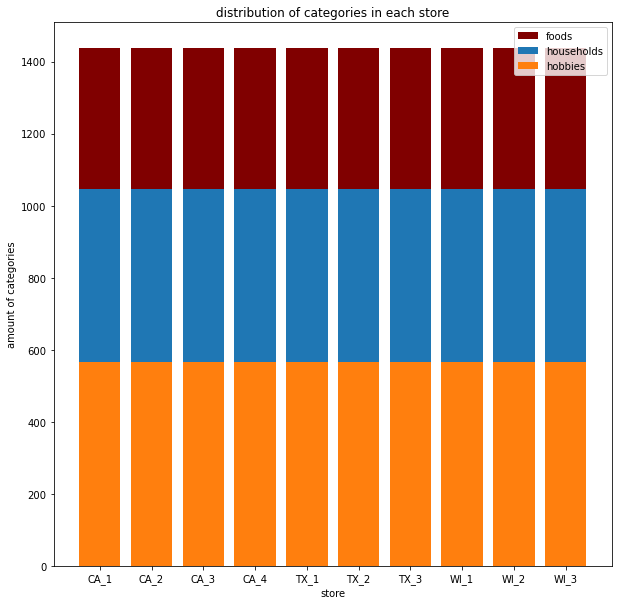

In [28]:
# Distribution of categories (foods, households, hobbies) in each store

store_name=pd.unique(sales['store_id'])

hob_item=[]
food_item=[]
hold_item=[]
for i in store_name:
  hob_item.append(len(sales[(sales['store_id']==i) & (sales['cat_id']=='HOBBIES')]))
  food_item.append(len(sales[(sales['store_id']==i) & (sales['cat_id']=='FOODS')]))
  hold_item.append(len(sales[(sales['store_id']==i) & (sales['cat_id']=='HOUSEHOLD')]))
plt.figure(figsize=(10,10))
plt.bar(store_name,food_item,color='maroon',label='foods')
plt.bar(store_name,hold_item,label='households')
plt.bar(store_name,hob_item,label='hobbies')
plt.legend(loc=0)
plt.title('distribution of categories in each store')
plt.xlabel('store')
plt.ylabel('amount of categories')
plt.show()

total no of departments 7

products per departments
FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64



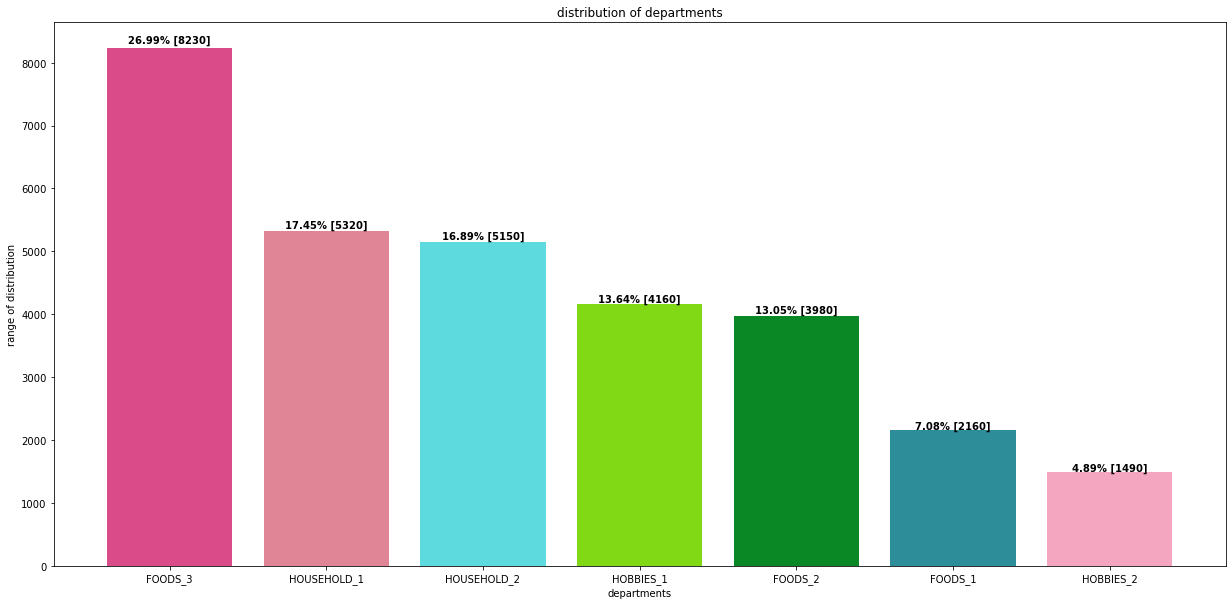

In [29]:
# Each category is divided in departments. 

distribution_of_products_row_per_column_plt(sales, 'dept_id', 'departments')

We have more product that belong to the department FOODS_3.

In [30]:
# Each row is a product sold in a single store (identified by the item_id). 

unique_products = sales['item_id'].value_counts()
print('Number of unique items present in our data:', len(unique_products))
print(unique_products[:20])

Number of unique items present in our data: 3049
HOBBIES_1_001    10
FOODS_2_210      10
FOODS_2_201      10
FOODS_2_202      10
FOODS_2_203      10
FOODS_2_204      10
FOODS_2_205      10
FOODS_2_206      10
FOODS_2_207      10
FOODS_2_208      10
FOODS_2_209      10
FOODS_2_211      10
FOODS_2_199      10
FOODS_2_212      10
FOODS_2_213      10
FOODS_2_214      10
FOODS_2_215      10
FOODS_2_216      10
FOODS_2_217      10
FOODS_2_218      10
Name: item_id, dtype: int64


We can have in two different rows the same item, because the same product can be sell in multiple stores. 

### 4.2 Exploring the dataset based on sales (considering all days)


In [31]:
# Function that counts how many products are sold in each state, or in each department (and so on), based on the entire dataset
def bar_plots(data, column, title, xlabel, ylabel):    
  value = data.groupby(column).sum() # sum the sales of all the products related to a single column. we obtain the sales of each day 
  total_sales = value.iloc[:].sum(axis=1)   # consider all days sales
  print('Total sales of each ' + title)
  print(total_sales)
  print(total_sales.sum())

  percents = [str(np.round(i*(100/sum(total_sales.values)),2))+ '%'  for i in total_sales.values]
  fig = px.bar( x=total_sales.index,y=total_sales.values,color=total_sales.index, text = percents)
  fig.update_traces(textposition='outside')
  fig.update_layout(title = 'Sales of each ' + title, title_x = 0.5, width = 1000, height = 500, xaxis_title = xlabel, yaxis_title = ylabel)
  return fig.show()



In [32]:
# Total sales of each state

bar_plots(sales, 'state_id','state','Different states','Sales')


Total sales of each state
state_id
CA    29196717
TX    19228405
WI    18502051
dtype: int64
66927173


In [33]:
bar_plots(sales,'store_id','store','Different stores','Sales')

Total sales of each store
store_id
CA_1     7832248
CA_2     5818395
CA_3    11363540
CA_4     4182534
TX_1     5692823
TX_2     7329642
TX_3     6205940
WI_1     5261506
WI_2     6697988
WI_3     6542557
dtype: int64
66927173


Observation: CA_3 is the store that sells more.

In [34]:
bar_plots(sales, 'cat_id','category','categories','Sales')

Total sales of each category
cat_id
FOODS        45922427
HOBBIES       6240656
HOUSEHOLD    14764090
dtype: int64
66927173


In [35]:
# Total sales of products in different departments

bar_plots(sales, 'dept_id','department','departments','Sales')

Total sales of each department
dept_id
FOODS_1         5190400
FOODS_2         7795025
FOODS_3        32937002
HOBBIES_1       5699014
HOBBIES_2        541642
HOUSEHOLD_1    11722853
HOUSEHOLD_2     3041237
dtype: int64
66927173


Observation: food is the category the present the majority of sold products. in particular FOODS_3 is the department that has more sold products.

In [36]:
from plotly.subplots import make_subplots

def state_wise_sales(data,column_1, column_2):
  states = list(sales[column_1].unique())
  print(states)
  categ = list(sales[column_2].unique())
  print(categ)
  
  
  val=[]
  percents = []
  for i in states:
    state=sales[sales['state_id']==i]
    value=state.groupby(column_2).sum()
    total_sales=value.iloc[:].sum(axis=1)
    
    val.append(list(total_sales.values))
    percents.append([str(np.round(i*(100/sum(total_sales.values)),2))+ '%'  for i in total_sales.values])

  fig = make_subplots(rows=1, cols=3,subplot_titles= states, row_titles=['Sales'])

  fig.add_trace(go.Bar(x=categ, y=val[0], name = states[0], text= percents[0]),1,1)
  fig.add_trace(go.Bar(x=categ, y=val[1], name = states[1], text= percents[1]),1,2)
  fig.add_trace(go.Bar(x=categ, y=val[2], name = states[2], text= percents[2]),1,3)
  

  fig.update_layout(title='Most happening sales category per state',title_x=0.5,width=1000, height=600, xaxis_title='different states',yaxis_title='Sales')
  fig.show()
state_wise_sales(sales, 'state_id', 'cat_id')

['CA', 'TX', 'WI']
['HOBBIES', 'HOUSEHOLD', 'FOODS']


Observation: the distribution of the sales is similar in the three states.

In [37]:
# Most saled product among all states

most_sales = sales.groupby('item_id').sum()
most_sales = (most_sales.sum(axis = 1))
most_sales = most_sales.sort_values(ascending = False)[:10]

fig = px.bar(x = most_sales.index, y = most_sales.values)
fig.update_layout(title = 'highest sold product', title_x=0.5, width = 1000, height=500, xaxis_title = 'products', yaxis_title = 'sales')

In [38]:
# Most saled products for each state

for i in ['CA','WI','TX']:
  most_sales = sales[sales['state_id']==i]
  most_sales = most_sales.groupby('item_id').sum()
  most_sales = most_sales.sum(axis=1)
  most_sales=most_sales.sort_values(ascending=False)[:10]


  fig=px.bar(x=most_sales.index,y=most_sales.values)
  fig.update_layout(title='highest sold product ',title_x=0.5,width=800, height=300,xaxis_title='products',yaxis_title='sales')
  fig.update_traces(marker_color='green',row=1,col=1)
  fig.show()


observations

* among all states, FOODS_3_090 item got nearly 1M sales

* FOODS_3_586 item also had higher sales approximatively 1M 

* top 10 highly sold items belongs to the food category, so in each state food items are been highly sold

### 4.3 Observations

*   We have 3 states
*   Each state has 4 or 3 stores
*   Each store sell products that belong to one of 3 three categories: FOOD, HOBBIES or HOUSEHOLD
*   Each category of products can be divided in others categories (aka departments). We have 7 departments.
*   Each departments can have different products.


*   In each row of the dataset we have the time series related to the daily sales of a single product. We can have multiple products (row) sharing the same item_id, because each product can be sold in multiple stores. 

*   We have a lot of products related to food category. It amounts to 47.13% and next category is household with 34% and least amount of items are hobbies category.
*   We have more data belonging to CA state.

## 5. Exploring time series


### 5.1 Some manipulations


We have two separate datasets: the calendar and the sales ones. We need to do some manipulations in order to use them together.

In [39]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In the columns related to events we have NaN values. Calendar has a shape of 1969 rows, but we need only to 1941 rows.

In [40]:
calendar_new = calendar[:1941].fillna('no_event') #replacing nan values as 'no event'
calendar_new.head() 

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1


In [41]:
# Sales on each day

#get all the days from d_1 to d_1941
days = sales.columns[6:]
#get the total sales of each day
each_day_sale = sales[days].sum().values

fig = px.line(x = calendar_new['date'], y = each_day_sale, title = 'Sales occured on each day', labels = {'x':'Years','y':'Sales'})
fig.update_layout(title_x=.5)
fig.show()

In [42]:
calendar_new['sales']=each_day_sale

calendar_new.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0,32631
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0,31749
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0,23783
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0,25412
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1,19146


Observation: seasonality and trend are present. The former is annual, the latter is ascending. In addition by zooming the plot in frames of month and week we can find seasonality.

### 5.2 Sales in each state and in each store

In [43]:
#creating the function for daily sales
def daily_sales(data, column, title, title_x_axis): 
  fig1 = go.Figure()
  value = data.groupby(column).sum()   
  states = len(value.index)            

  for i in range(states):
    fig1.add_trace(go.Scatter(x = calendar_new.date, y = value.iloc[i], name = value.index[i]))
  fig1.update_layout(title = title, title_x = 0.5, xaxis_title = 'Sales of each' + title_x_axis, yaxis_title = 'Sales')
  return fig1.show()




In [44]:
daily_sales(sales, 'state_id', 'state', 'Years')

observation:
*   more sales are occuring in california state than other two states
*   TX and WI present a similar sales pattern
*   in CA sales slightly increase 
*   and at end of each year sales are droping (christmas event)


In [45]:
daily_sales(sales, 'store_id', 'store', 'Years')

### 5.3 Monthly sales


In [46]:
def month_sales(data, column, title, xlabel, ylabel): 
  fig = go.Figure()
  value = data.groupby(column).sum().T  
  
  index = value.columns
  dates = calendar_new['date'].map(lambda x:x[:-3]).values  # we get the date removing the day: from 2011-01-01 to 2011-01
  value['date'] = dates
  final = value.groupby('date').sum()

  for i in index:
    fig.add_trace(go.Scatter(x=final.index,y=final[i],name=i))
  fig.update_layout(title='Sales of each ' + title, title_x=0.5,xaxis_title=xlabel,yaxis_title=ylabel)
  return fig.show()

In [47]:
# Month sales of each state
month_sales(sales, 'state_id', 'state', 'year', 'sales')

In [48]:
# Month sales of each department

month_sales(sales, 'dept_id', 'dept', 'year', 'sales')

In [49]:
month_sales(sales, 'cat_id', 'category', 'year', 'sales')

Observation: the Food category slightly increase over years. The other two are more or less the same.

In [50]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


### 5.4 Trend of one product

In [51]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [52]:
print(sales[sales.id == 'FOODS_3_090_CA_3_evaluation'])

                               id      item_id  dept_id cat_id store_id  \
8412  FOODS_3_090_CA_3_evaluation  FOODS_3_090  FOODS_3  FOODS     CA_3   

     state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  \
8412       CA  108  132  102  120  ...     143     156     187      76   

      d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
8412      85      69      75     110     156      99  

[1 rows x 1947 columns]


Let's consider a random sample sales data. We want to understand the trend of the product over years


In [53]:
ids = sorted(list(set(sales['id'])))
d_cols = [c for c in sales.columns if 'd_' in c]
x_1 = sales.loc[sales['id'] == ids[2]].set_index('id')[d_cols].values[0]
print(ids[2])
x_2 = sales.loc[sales['id'] == ids[1]].set_index('id')[d_cols].values[0]
print(ids[1])
x_3 = sales.loc[sales['id'] == ids[17]].set_index('id')[d_cols].values[0]
print(ids[17])
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales")
fig.show()

FOODS_1_001_CA_3_evaluation
FOODS_1_001_CA_2_evaluation
FOODS_1_002_WI_1_evaluation


As expected, the pattern is not regular, and this is due to the fact that there are many factors affecting the sales on a given day. We can see that the sales quantity is sometimes zero, which could mean that a certain product may not be available on that day or that the store is closed on that day

Let's zoom in the trends

In [54]:
ids = sorted(list(set(sales['id'])))
d_cols = [c for c in sales.columns if 'd_' in c]
x_1 = sales.loc[sales['id'] == ids[0]].set_index('id')[d_cols].values[0][:90]
print(ids[0])
x_2 = sales.loc[sales['id'] == ids[4]].set_index('id')[d_cols].values[0][1300:1400]
print(ids[4])
x_3 = sales.loc[sales['id'] == ids[65]].set_index('id')[d_cols].values[0][350:450]
print(ids[65])
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines+markers', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines+markers', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines+markers', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales snippets")
fig.show()

FOODS_1_001_CA_1_evaluation
FOODS_1_001_TX_1_evaluation
FOODS_1_008_TX_2_evaluation


 By looking at these plots, we can confirm what we stated above: there are some days in which we have no sales and the pattern is not regular. 

### 5.5 Average sales

Let's now consider the average sales trends

In [55]:
#creating function for average sales 
def avg_sales(column, title, label, size):
  group = calendar_new.groupby(column).mean() 

  plt.figure(figsize=size)
  ax=sns.barplot(x = group.index, y = group['sales'])
  for p in ax.patches:
      ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()))
  plt.title(title)
  plt.xlabel(label)
  plt.ylabel('sales')
  plt.show()

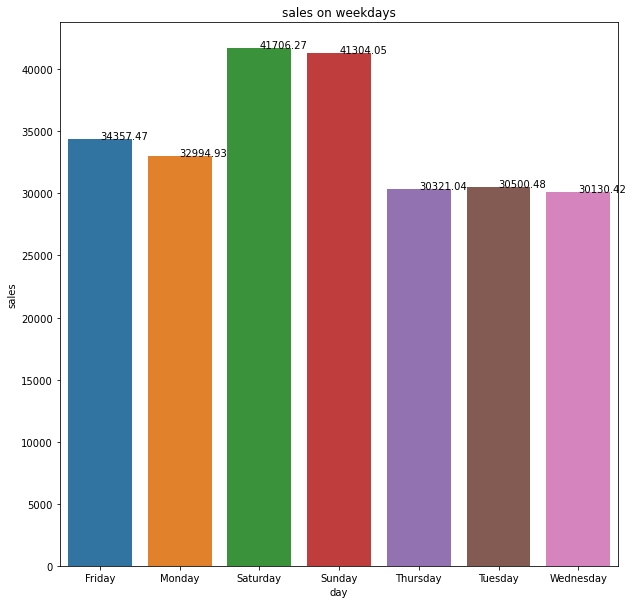

In [56]:
# average sales per weekday

avg_sales('weekday', 'sales on weekdays', 'day', size = (10,10))

Observation: sunday and saturday are the day in which there are more sales. Low sales are on tuesday, wednesday and thursday

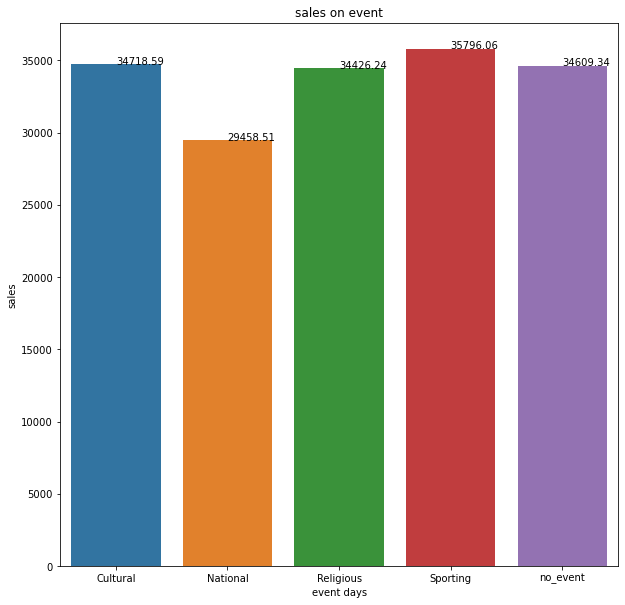

In [57]:
#average sales per event type 1

avg_sales('event_type_1','sales on event','event days',size=(10,10))

Observation: on average in case of sporting events sales are the highest ones. Instead in case of National events the sales are the lowest.
We can also see that even if there is "no event" sales still appear.

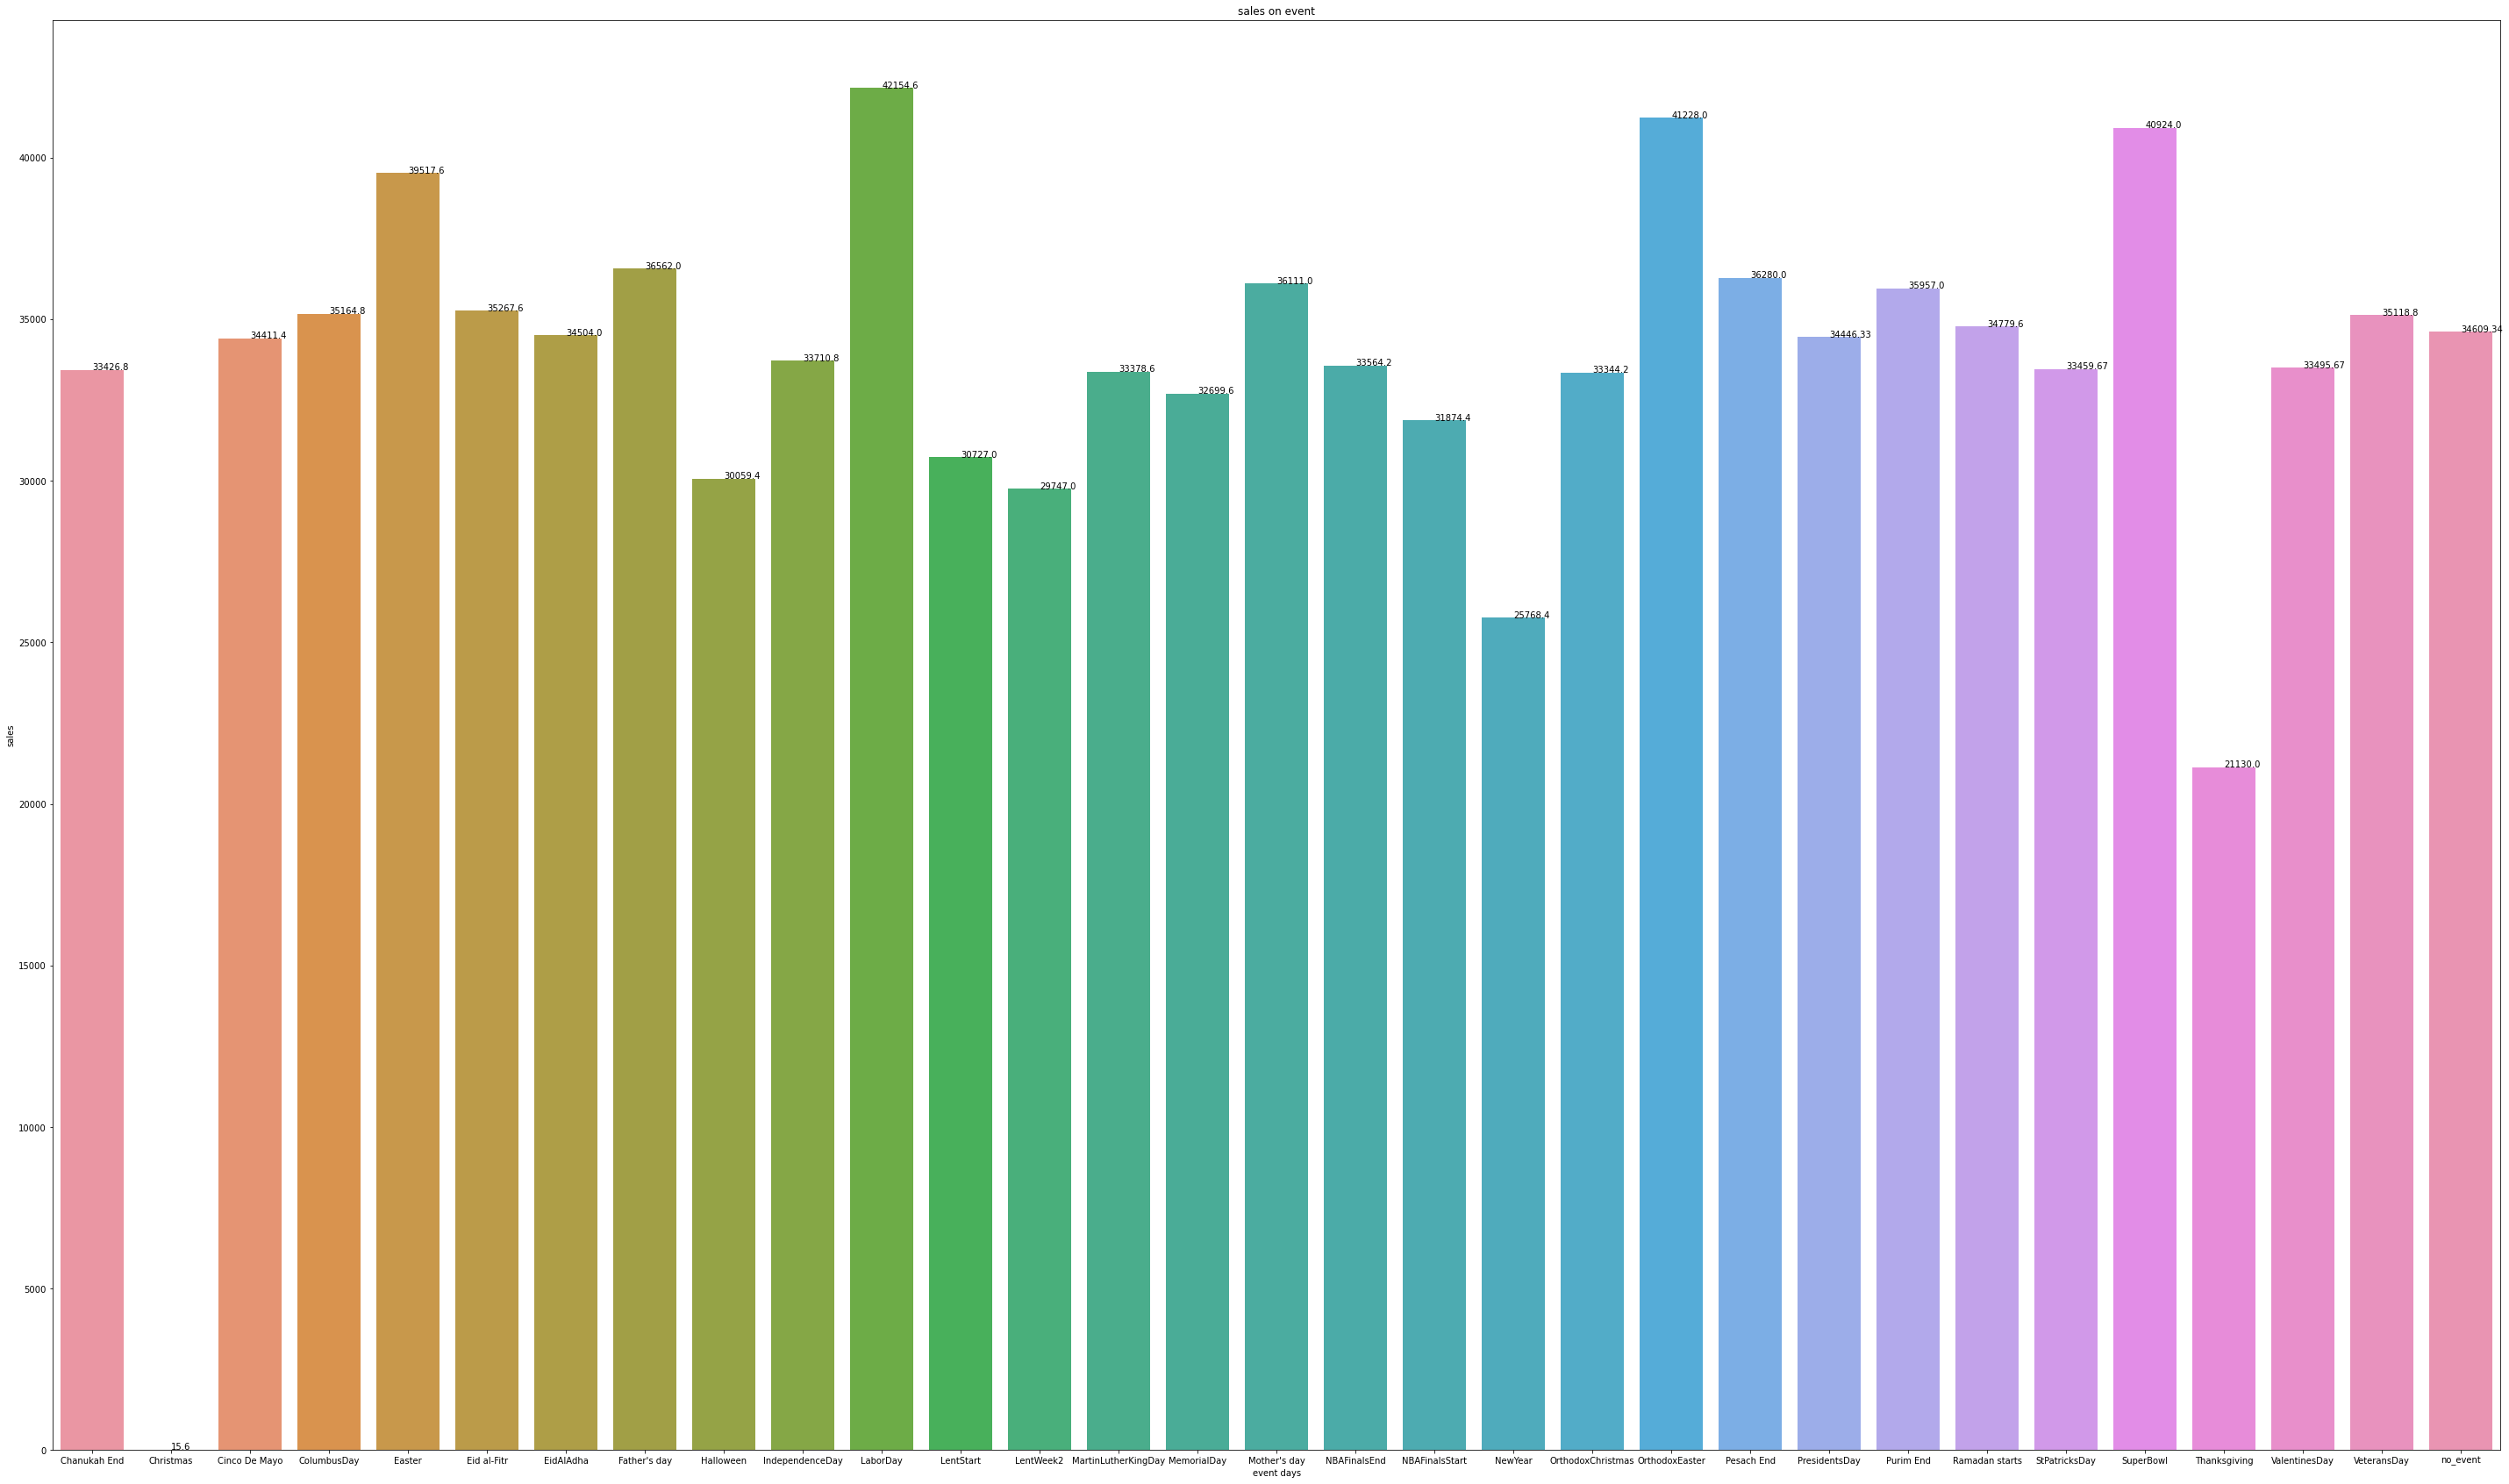

In [58]:
avg_sales('event_name_1','sales on event','event days',size=(50,30))

observation: on average more sales happened on "LaborDay" and very low sales are on Christmas, maybe because store are closed. 

Supplemental Nutrition Assistance Program (SNAP)
[From Wikipedia https://en.wikipedia.org/wiki/Supplemental_Nutrition_Assistance_Program]

In the United States, the Supplemental Nutrition Assistance Program (SNAP), formerly known as the Food Stamp Program, is a federal program that provides food-purchasing assistance for low- and no-income people. 

The amount of SNAP benefits received by a household depends on the household's size, income, and expenses. For most of its history, the program used paper-denominated "stamps" or coupons – worth $1 (brown), $5 (blue), and $10 (green) – bound into booklets of various denominations, to be torn out individually and used in single-use exchange. Now the coupons are replaced with a debit card known as Electronic Benefit Transfer (EBT). Each month, SNAP benefits are directly deposited into the household's EBT card account. Households may use EBT to pay for food at supermarkets, convenience stores, and other food retailers, including certain farmers' markets.

In [59]:
snaps = sales.groupby('state_id').sum().T
print(snaps)
snaps['d'] = snaps.index
snaps.head()

state_id     CA     TX     WI
d_1       14195   9438   8998
d_2       13805   9630   8314
d_3       10108   6778   6897
d_4       11047   7381   6984
d_5        9925   5912   3309
...         ...    ...    ...
d_1937    15678  10375  11043
d_1938    16297   9162  11504
d_1939    17430  12303  12819
d_1940    23103  13681  14734
d_1941    24644  14815  14879

[1941 rows x 3 columns]


state_id,CA,TX,WI,d
d_1,14195,9438,8998,d_1
d_2,13805,9630,8314,d_2
d_3,10108,6778,6897,d_3
d_4,11047,7381,6984,d_4
d_5,9925,5912,3309,d_5


In [60]:
merge = pd.merge(snaps, calendar, on='d')
merge.head()

,CA,TX,WI,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,14195,9438,8998,d_1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,13805,9630,8314,d_2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,10108,6778,6897,d_3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,11047,7381,6984,d_4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,9925,5912,3309,d_5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [61]:
merge['CA'][merge['snap_CA'] == 1].mean()

15823.4234375

In [62]:
from plotly.subplots import make_subplots

def state_wise_sales(data,column_1, column_2):
  states = list(sales[column_1].unique())
  print(states)
  categ = [['FOODS','HOBBIES', 'HOUSEHOLD']]
  
  
  val=[]
  percents = []
  for i in states:
    state=sales[sales['state_id']==i]
    value=state.groupby(column_2).sum()
    total_sales=value.iloc[:].sum(axis=1)
    
    val.append(list(total_sales.values))
    percents.append([str(np.round(i*(100/sum(total_sales.values)),2))+ '%'  for i in total_sales.values])

  fig = make_subplots(rows=1, cols=3,subplot_titles= states, row_titles=['Sales'])

  fig.add_trace(go.Bar(x=categ, y=val[0], name = states[0], text= percents[0]),1,1)
  fig.add_trace(go.Bar(x=categ, y=val[1], name = states[1], text= percents[1]),1,2)
  fig.add_trace(go.Bar(x=categ, y=val[2], name = states[2], text= percents[2]),1,3)
  

  fig.update_layout(title='Most happening sales category per state',title_x=0.5,width=1000, height=600, xaxis_title='different states',yaxis_title='Sales')
  fig.show()
state_wise_sales(sales, 'state_id', 'cat_id')

['CA', 'TX', 'WI']
['HOBBIES', 'HOUSEHOLD', 'FOODS']


In [63]:
def avg_sales_snap(state):
  val_1=merge[state][merge['snap_'+state]==1].mean()
  val_0=merge[state][merge['snap_'+state]==0].mean()

  return val_1,val_0

from plotly.subplots import make_subplots

states = list(sales['state_id'].unique())
snaps=['snap','no-snap']
val=[]
for i in states:
  x,y=avg_sales_snap(i)
  val.append([x,y])


fig = make_subplots(rows=1, cols=3,subplot_titles=states,row_titles=['Average sales'])

fig.add_trace(go.Bar(x=snaps,y=val[0], name = states[0] ),1,1)
fig.add_trace(go.Bar(x=snaps,y=val[1], name = states[1]),1,2)
fig.add_trace(go.Bar(x=snaps,y=val[2], name = states[2]),1,3)

fig.update_layout(title='average sales of each state on snap purchase',title_x=0.5,width=1000, height=600,xaxis_title='different states',yaxis_title='Average sales')
fig.show()

Observations: the sales are higher on snap purchase days (probably because also low income people can buy)

### 5.6 Sale price 


Let's now consider the dataset sell_prices

In [64]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [65]:
sell_prices.shape

(6841121, 4)

In [66]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


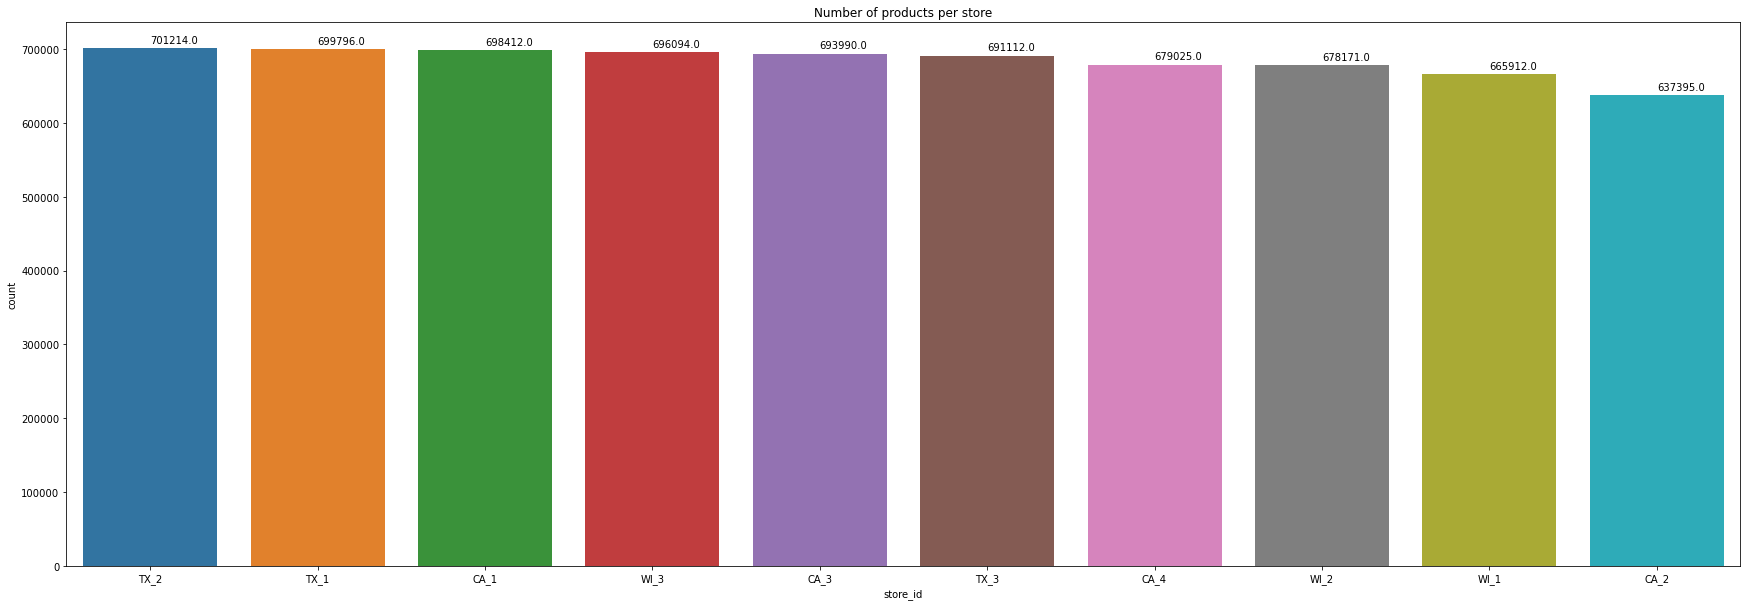

In [67]:
# Plot the number of products that each store sold 
plot_bar_sns(sell_prices, 'store_id', 'count', 'Number of products per store')

In [68]:
print('Number of unique items: ')
sell_prices.item_id.nunique()

Number of unique items: 


3049

In [69]:
sell_prices['cat_id'] = sell_prices['item_id'].map(lambda x :x.split('_')[0])
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price,cat_id
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES


In [70]:
sell_prices.sell_price.describe()

count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64

Distribution

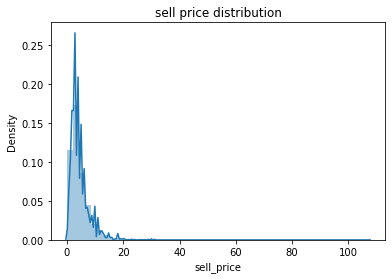

In [71]:
sns.distplot(sell_prices.sell_price)
plt.title("sell price distribution")
plt.show()

In [72]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =sell_prices.sell_price.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 1.24
20 percentile value is 1.97
30 percentile value is 2.48
40 percentile value is 2.88
50 percentile value is 3.47
60 percentile value is 3.98
70 percentile value is 4.98
80 percentile value is 6.27
90 percentile value is 8.64
100 percentile value is  107.32


In [73]:
#looking into 90-100th percentile
for i in range(90, 100, 1):
    var =sell_prices.sell_price.values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 8.64
91 percentile value is 8.97
92 percentile value is 9.47
93 percentile value is 9.92
94 percentile value is 9.98
95 percentile value is 10.98
96 percentile value is 11.88
97 percentile value is 12.87
98 percentile value is 14.48
99 percentile value is 17.92
100 percentile value is  107.32


In [74]:
def avg_price(column, xlabel, title):

  price=sell_prices.groupby(column).mean()

  fig=px.bar(x=price.index, y=price['sell_price'])
  fig.update_layout(title=title, title_x=0.5, width=800, height=400, xaxis_title=xlabel, yaxis_title='average price')
  fig.show()


In [75]:
avg_price('cat_id' ,'different category', 'categories')

observation: food prices are lower than other products prices. Households and hobbies have almost 2 times higher average price than food items.

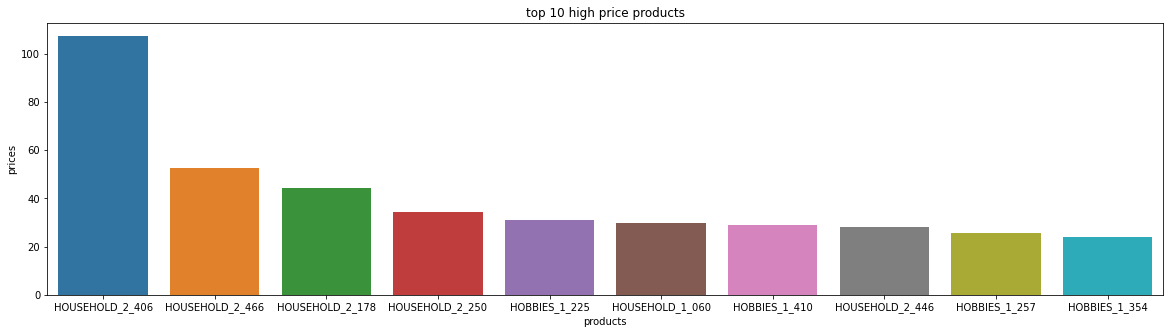

In [76]:
#top 10 highest priced product

def top_10(level,title):
  if level == 'high':
    level = False
  else:
    level = True
  high_price = sell_prices.sort_values(by='sell_price',ascending=level)
  high_price=high_price[['item_id','sell_price']]
  high_price=high_price.drop_duplicates(subset =['item_id'])
  high_price=high_price.drop_duplicates(subset =['sell_price'])[:10]

  plt.figure(figsize=(20,5))
  sns.barplot(x=high_price['item_id'],y=high_price['sell_price'])
  plt.xlabel('products')
  plt.ylabel('prices')
  plt.title(title)
  plt.show()


top_10('high','top 10 high price products')

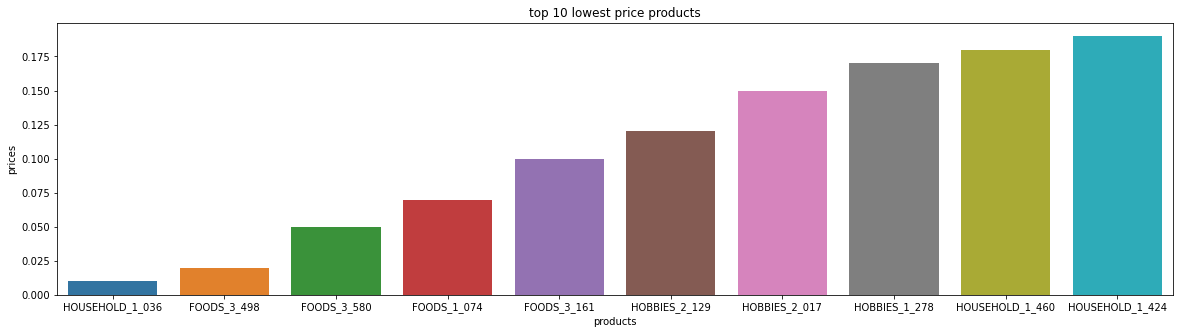

In [77]:
top_10('low','top 10 lowest price products')

## 5.7 Final observation from EDA

* Sales increase slightly and have almost same patterns for each year, finally sales are also dropped at end of year (on Christmas day).

* CA state registers most of sales, WI and TX have almost same sales growth over years, and overlapping of sales pattern.

* Sales are more on saturday and sunday. Lower sales are tuesday to thursday.

* Food items are the most sold products in all states.

* Over years the sales trend is increasing. We have also seasonality based on week, month and year.

* There very less sales in christmas event compare to other event day sales, and also at time of snap purchase sales are slightly higher than non snap time

* Sales are more on sport and cultural event types. In addition on no event type the sales are approximatively the same.

* Across all states average price of food items are very less than others. Highly priced items are recorded mostly for house holds and hobbies categories.